<a href="https://colab.research.google.com/github/bmontoyag/UTEC_MISTI_2026/blob/main/kobe_featureengineering_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**


# Feature Engineering with the Kobe Bryant Dataset

In [1]:
# Import Packages

# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as st

# plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler

# classification algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression

# dimension reduction
from sklearn.decomposition import PCA

# cross-validation
from sklearn.model_selection import train_test_split

# model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# text mining
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

## EXERCISE: Explore the Kobe Bryant Dataset

Explore the Kobe Bryant Dataset to understand what we may be able learn from it.

Tasks:
1. Get general information for the dataset using the methods `.head()`, `.tail()` and `.info()`.
2. Identify if there are any missing values using the method `.isnull()`.
3. Get summary statistics for the dataset using the method `.describe()`.
4. Identify potential target variables in this dataset.
5. Identify potential input features that could be used to predict your target variable.

In [4]:
# load the data as a pandas dataframe
KobeDataset = pd.read_csv('KobeData.csv')
print("Data dimensions:" + str(KobeDataset.shape))

Data dimensions:(14126, 31)


### TASK 1: Get General Information of Dataset

In [15]:
# TASK 1 EXERCISE

# Preview the first few rows
print("\n--- Head of the DataFrame ---")
KobeDataset.head()

# Preview the last few rows
print("\n--- Tail of the DataFrame ---")
KobeDataset.tail()

# Check all columns and data types
print("\n--- DataFrame Info ---")
KobeDataset.info()

# Add any additional methods of interest
#KobeDataset.describe()


--- Head of the DataFrame ---

--- Tail of the DataFrame ---

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action_type        14126 non-null  object 
 1   loc_x              14126 non-null  int64  
 2   loc_y              14126 non-null  int64  
 3   shot_distance      14125 non-null  float64
 4   shot_zone_basic    14126 non-null  object 
 5   shot_zone_area     14126 non-null  object 
 6   shot_type          14126 non-null  object 
 7   period             14126 non-null  int64  
 8   minutes_remaining  14126 non-null  int64  
 9   seconds_remaining  14126 non-null  int64  
 10  playoffs           14126 non-null  int64  
 11  season             14126 non-null  object 
 12  game_date          14125 non-null  object 
 13  matchup            14125 non-null  object 
 14  shot_made_flag     11830 non-nul

### TASK 2: Identify any missing data

In [11]:
# TASK 2 EXERCISE

# Check for missing values
print("\n--- Missing Values ---")
print(KobeDataset.isnull().sum())


--- Missing Values ---
action_type               0
combined_shot_type        0
game_event_id             0
game_id                   0
lat                       0
loc_x                     0
loc_y                     0
lon                       0
minutes_remaining         0
period                    0
playoffs                  0
season                    0
seconds_remaining         0
shot_distance             1
shot_made_flag         2296
shot_type                 0
shot_zone_area            0
shot_zone_basic           0
shot_zone_range           1
team_id                   1
team_name                 1
game_date                 1
matchup                   1
opponent                  1
shot_id                   1
New                       1
Away Game                 1
Days of Experience        1
Points                    1
OverTime                  1
Divisional Opponent       1
dtype: int64


### TASK 3: Generate Summary Statistics

In [12]:
# TASK 3 EXERCISE

# Get summary statistics for numeric columns
print("\n--- Summary Statistics (Numeric) ---")
KobeDataset.describe()


--- Summary Statistics (Numeric) ---


,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,Days of Experience,Points
count,14126.000000,1.412600e+04,14126.000000,14126.000000,14126.000000,14126.000000,14126.000000,14126.000000,14126.0,14126.000000,14125.00000,11830.000000,1.412500e+04,14125.000000,14125.000000,14125.000000
mean,243.194747,2.039204e+07,33.955500,10.421421,88.799731,-118.259379,4.944641,2.525343,0.0,28.470055,13.32085,0.455368,1.610613e+09,7063.000000,2969.880496,2.195752
std,145.909905,2.485845e+05,0.088351,111.056204,88.351370,0.111056,3.504543,1.155960,0.0,17.497325,9.51701,0.498025,0.000000e+00,4077.680611,908.249160,0.396793
min,2.000000,2.000001e+07,33.303300,-245.000000,-44.000000,-118.514800,0.000000,1.000000,0.0,0.000000,0.00000,0.000000,1.610613e+09,1.000000,1458.000000,2.000000
25%,109.000000,2.020024e+07,33.885300,-63.000000,0.000000,-118.332800,2.000000,1.000000,0.0,13.000000,4.00000,0.000000,1.610613e+09,3532.000000,2219.000000,2.000000
50%,248.000000,2.040086e+07,33.973300,0.000000,71.000000,-118.269800,5.000000,3.000000,0.0,28.000000,15.00000,0.000000,1.610613e+09,7063.000000,3043.000000,2.000000
75%,359.000000,2.060070e+07,34.044300,105.000000,159.000000,-118.164800,8.000000,3.000000,0.0,43.000000,20.00000,1.000000,1.610613e+09,10594.000000,3744.000000,2.000000
max,639.000000,2.080072e+07,34.088300,248.000000,741.000000,-118.021800,11.000000,7.000000,0.0,59.000000,74.00000,1.000000,1.610613e+09,14125.000000,4476.000000,3.000000


## Explore Data Types

In [13]:
# we will narrow our focus to only the 15 features listed above
KobeDataset = KobeDataset.filter(["action_type", "loc_x", "loc_y","shot_distance", "shot_zone_basic", "shot_zone_area", "shot_type",
                                  "period", "minutes_remaining", "seconds_remaining", "playoffs", "season", "game_date","matchup", "shot_made_flag"])

print("Filtered Data dimensions:" + str(KobeDataset.shape))

# display the first 10 lines
display(KobeDataset.head(10))

Filtered Data dimensions:(14126, 15)


,action_type,loc_x,loc_y,shot_distance,shot_zone_basic,shot_zone_area,shot_type,period,minutes_remaining,seconds_remaining,playoffs,season,game_date,matchup,shot_made_flag
0,Jump Shot,167,72,18.0,Mid-Range,Right Side(R),2PT Field Goal,1,10,27,0,2000-01,10/31/00,LAL @ POR,NaN
1,Jump Shot,-157,0,15.0,Mid-Range,Left Side(L),2PT Field Goal,1,10,22,0,2000-01,10/31/00,LAL @ POR,0.0
2,Jump Shot,-101,135,16.0,Mid-Range,Left Side Center(LC),2PT Field Goal,1,7,45,0,2000-01,10/31/00,LAL @ POR,1.0
3,Jump Shot,138,175,22.0,Mid-Range,Right Side Center(RC),2PT Field Goal,1,6,52,0,2000-01,10/31/00,LAL @ POR,0.0
4,Driving Dunk Shot,0,0,0.0,Restricted Area,Center(C),2PT Field Goal,2,6,19,0,2000-01,10/31/00,LAL @ POR,1.0
5,Jump Shot,-145,-11,14.0,Mid-Range,Left Side(L),2PT Field Goal,3,9,32,0,2000-01,10/31/00,LAL @ POR,0.0
6,Layup Shot,0,0,0.0,Restricted Area,Center(C),2PT Field Goal,3,8,52,0,2000-01,10/31/00,LAL @ POR,1.0
7,Jump Shot,1,28,2.0,Restricted Area,Center(C),2PT Field Goal,3,8,5,0,2000-01,10/31/00,LAL @ POR,NaN
8,Jump Shot,-65,108,12.0,In The Paint (Non-RA),Left Side(L),2PT Field Goal,3,6,12,0,2000-01,10/31/00,LAL @ POR,1.0
9,Running Jump Shot,-33,125,12.0,In The Paint (Non-RA),Center(C),2PT Field Goal,3,3,36,0,2000-01,10/31/00,LAL @ POR,0.0


In [14]:
# We can use .iloc to see single rows at a time, and .unique() to see the unique values in a feature

display(KobeDataset['action_type'].unique())
print()
KobeDataset.iloc[[2]]

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Driving Layup Shot', 'Reverse Layup Shot',
       'Reverse Dunk Shot', 'Slam Dunk Shot', 'Turnaround Jump Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

,action_type,loc_x,loc_y,shot_distance,shot_zone_basic,shot_zone_area,shot_type,period,minutes_remaining,seconds_remaining,playoffs,season,game_date,matchup,shot_made_flag
2,Jump Shot,-101,135,16.0,Mid-Range,Left Side Center(LC),2PT Field Goal,1,7,45,0,2000-01,10/31/00,LAL @ POR,1.0


**DISCUSSION QUESTION:** From the Kobe Bryant dataset, what column could be used as the output label, and what columns could be used as input features?

*YOUR ANSWER HERE:*

### EXERCISE: Identify Feature Data Types

Identify the python data types of the following variables and their respective data type categories using the `.dtype` attribute as depicted in the following concept. Remember to print out examples using the method `.sample(~)` to help you identify the data types in more detail.

Tasks:
1. Identify the datatype of the feature `loc_x`. Print some samples from the dataframe.
2. Identify the datatype of the feature `action_type`. Print some samples from the dataframe.
3. Identify the datatype of the feature `playoffs`. Print some samples from the dataframe.

#### TASK 1: Identify the Data Type of `loc_x`

In [17]:
# TASK 1 EXERCISE

# Identify the Data Type
datatype_loc_x = KobeDataset['loc_x'].dtype
print("Data type of loc_x: ", datatype_loc_x)

# Print 5 values of the column
print("\n--- Sample 'loc_x' values ---")
print(KobeDataset['loc_x'].sample(5))

Data type of loc_x:  int64

--- Sample 'loc_x' values ---
12825      0
5600       0
11467    121
9990       0
5374    -212
Name: loc_x, dtype: int64


#### TASK 2: Identify the Data Type of `action_type`

In [18]:
# TASK 2 EXERCISE

# Identify the Data Type
datatype_action_type = KobeDataset['action_type'].dtype
print("Data type of action_type: ", datatype_action_type)

# Print 5 values of the column
print("\n--- Sample 'action_type' values ---")
print(KobeDataset['action_type'].sample(5))

Data type of action_type:  object

--- Sample 'action_type' values ---
9540               Jump Shot
3658               Jump Shot
2884               Jump Shot
4105       Running Jump Shot
7339    Alley Oop Layup shot
Name: action_type, dtype: object


#### TASK 3: Identify the Data Type of `playoffs`

In [19]:
# TASK 3 EXERCISE

# Identify the Data Type
datatype_playoffs = KobeDataset['playoffs'].dtype
print("Data type of playoffs: ", datatype_playoffs)

# Print 5 values of the column
print("\n--- Sample 'playoffs' values ---")
print(KobeDataset['playoffs'].sample(5))

Data type of playoffs:  int64

--- Sample 'playoffs' values ---
12313    0
6280     0
6693     0
4766     0
9487     0
Name: playoffs, dtype: int64


**DISCUSSION QUESTION:** What are the different Python data types and more specifically, what are the data type categories for loc_x, action_type, and playoffs?

*YOUR ANSWER HERE:*

## Data Pre-Processing

### EXERCISE: Data Pre-Processing with Typecasting and Removing Missing Data

Now we will practice data pre-processing techniques essential for preparing our dataset for analysis, including handling missing values and converting data types to appropriate formats.

Tasks:
1. First, we will practice typecasting some of the features. Here, we focus on `game_date`. This is a date column which is in a string format. Convert this column into a datetime format using the `pd.to_datetime(~).dt.date` method. This method retains only the date part of the feature, which is relevant here, as there is no time portion to the feature. Has the minimum date value changed? Has the python datatype printout (`.dtypes(~)`) changed?
2. Address the missing data points in this dataset. First, remove all of the rows where there is missing data in our target `shot_made_flag`. Next, replace the `NaN` values in `shot_distance` column with the mean of the column.

#### TASK 1: Perform Typecasting

In [24]:
# Prior to typecasting, the following fields with dates look like this:


print("minimum game_date before typecasting is: ", KobeDataset['game_date'].dropna().min(axis=0))
KobeDataset.dtypes['game_date']

minimum game_date before typecasting is:  2000-10-31


dtype('O')

In [25]:
# TASK 1 EXERCISE

# Convert the column to datetime format
KobeDataset['game_date'] = pd.to_datetime(KobeDataset['game_date'], errors='coerce').dt.date

# Check what the minimum date is after updating the date format
# Use .dropna() to exclude NaT values that might have resulted from 'errors=coerce'
print("minimum game_date after typecasting is: ", KobeDataset['game_date'].dropna().min(), "\n")

# Notice that the python data type has not changed visibly, but a lot has changed under the hood
print("Data type of game_date after typecasting: ", KobeDataset.dtypes['game_date'])

minimum game_date after typecasting is:  2000-10-31 

Data type of game_date after typecasting:  object


**DISCUSSION QUESTION:** Why is typecasting to a date type necessary for the columns which have date information?

*YOUR ANSWER HERE:*

#### TASK 2: Address Missing Data

Next, lets check for missing data
Missing data in this dataset is represented by nan values (as opposed to blanks, "?", etc)
This is convenient for data stored in a pandas dataframe.

If you look at the output of `KobeDataset.info()`, you will see that, we have exactly 5000 nulls in our dependent variable.

As a data scientist, whenever you see such a round number for anything, you should be suspicious! *Why would the dataset be missing EXACTLY 5000 values?*

In this case, these values were removed for the purposes of competition on Kaggle.com, to be evaluated as the competitors' test set. Since this is our dependent variable, we don't have much choice but to remove the 5000 records. Remove the 5000 records in the `shot_made_flag` column by using `.loc(~)`,
filtering for all the rows with non-null values. Let's check that exactly 5000 were removed.

Finally, replace the `NaN` value in the `shot_distance` column with the mean value using the `.fillna(~, inplace = True)` substituting "~" for the mean column value.

In [26]:
# TASK 2 EXERCISE

# Look at Data
KobeDataset.info()
print('\n')
FullLength = len(KobeDataset)

# Remove the Missing Rows and then Save This Updated Dataframe to KobeDataset
KobeDataset = KobeDataset.loc[KobeDataset['shot_made_flag'].notna()]
print("Removed", FullLength - len(KobeDataset), "records with null shot_made flag")

# Replace the Nans in `shot_distance` with the mean of the column
KobeDataset['shot_distance'].fillna(KobeDataset['shot_distance'].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 11830 entries, 1 to 14125
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action_type        11830 non-null  object 
 1   loc_x              11830 non-null  int64  
 2   loc_y              11830 non-null  int64  
 3   shot_distance      11830 non-null  float64
 4   shot_zone_basic    11830 non-null  object 
 5   shot_zone_area     11830 non-null  object 
 6   shot_type          11830 non-null  object 
 7   period             11830 non-null  int64  
 8   minutes_remaining  11830 non-null  int64  
 9   seconds_remaining  11830 non-null  int64  
 10  playoffs           11830 non-null  int64  
 11  season             11830 non-null  object 
 12  game_date          11829 non-null  object 
 13  matchup            11829 non-null  object 
 14  shot_made_flag     11830 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


Removed 0 record

## Visualize Data

In [27]:
# Frequency table for how many datapoints have a specific category and label
pd.crosstab(KobeDataset["shot_zone_basic"], KobeDataset["shot_made_flag"])

shot_made_flag,0.0,1.0
shot_zone_basic,,
Above the Bre,0,1
Above the Break 3,1312,724
Backcourt,29,1
In The Paint (Non-RA),863,719
Left Corner 3,67,37
Mid-Range,2968,2055
Restricted Area,1108,1798
Right Corner 3,96,52


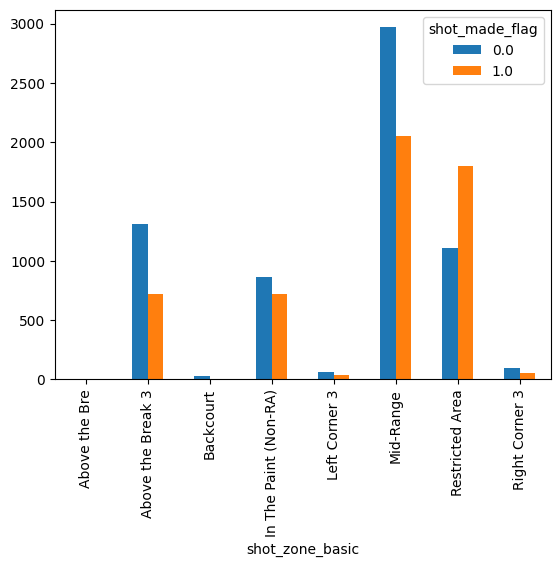

In [28]:
# a plot of the table above
pd.crosstab(KobeDataset['shot_zone_basic'], KobeDataset['shot_made_flag']).plot(kind="bar");

For numerical features, we don't have categories that we can use as the x-axis. But we can split the datapoints into bins, such as 0.0 to 0.1 and look at the number of 0 and 1 labels for that bin.

<Axes: xlabel='seconds_remaining'>

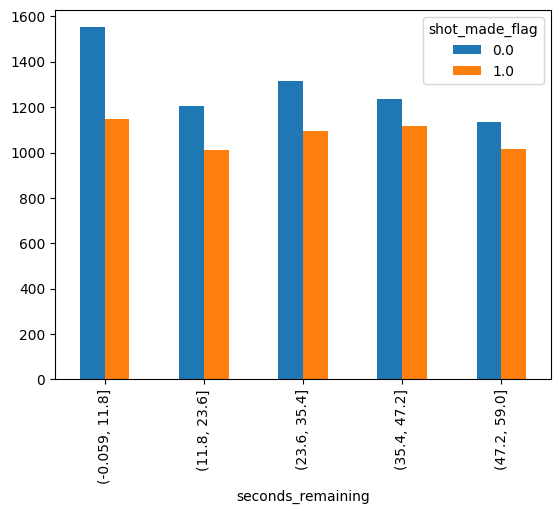

In [29]:
# For numerical variables, we can bin the amounts and check frequency of labels within each bin
pd.crosstab(pd.cut(KobeDataset["seconds_remaining"], bins= 5), KobeDataset['shot_made_flag']).plot(kind= "bar")

### EXERCISE: Visualize some of our data

Let's now visualize some of our features. Make additional plots of additional features as time allows.

Tasks:
1. Make a plot to visualize the feature `shot_distance` in relation to the target variable `shot_made_flag`. First, define the bin bounds as the minimum value, 6, 10, 15, 20, 25, and the maximum value. Next, use `pd.cut(~)` to split the data into those bins. Next, use `pd.crosstab(~)` to compute a simple cross tabulation. A cross tabulation (often called a crosstab) is a table that shows the relationship between two or more categorical variables by counting how many observations fall into each combination of categories. Plot this crosstab using `crosstab_result.plot(~)`.
2. Make a plot to visualize the feature `shot_distance` in relation to the target variable `shot_made_flag`. This should be much easier than making a plot for `shot_distance`. You can use `pd.crosstab(~)` or a similar plotting function.

#### TASK 1: Plot `shot_distance`

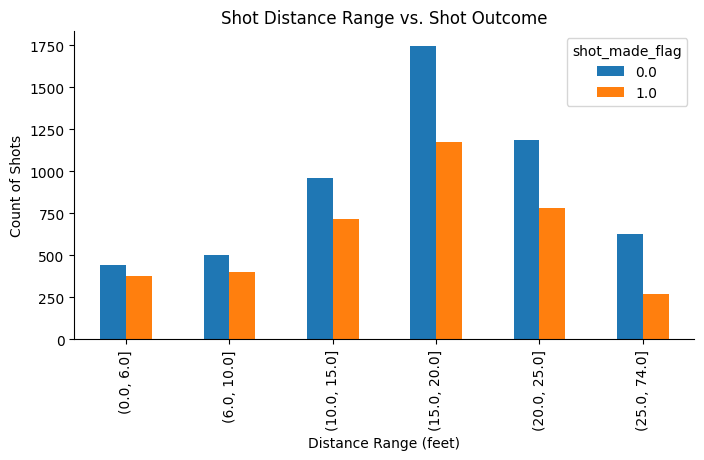

In [30]:
# TASK 1 EXERCISE

# Define bins for shot distance
distance_bins = [
    KobeDataset['shot_distance'].min(), 6, 10, 15, 20, 25, KobeDataset['shot_distance'].max()
]

# Group shots into distance bins
distance_groups = pd.cut(KobeDataset["shot_distance"], bins=distance_bins)

# Create a crosstab comparing distance range vs. shot_made_flag
crosstab_result = pd.crosstab(distance_groups, KobeDataset['shot_made_flag'])

# Plot the crosstab as a bar chart
crosstab_result.plot(kind="bar", figsize=(8, 4))
plt.title("Shot Distance Range vs. Shot Outcome")
plt.xlabel("Distance Range (feet)")
plt.ylabel("Count of Shots")
sns.despine()
plt.show()

#### TASK 2: Plot `shot_type`

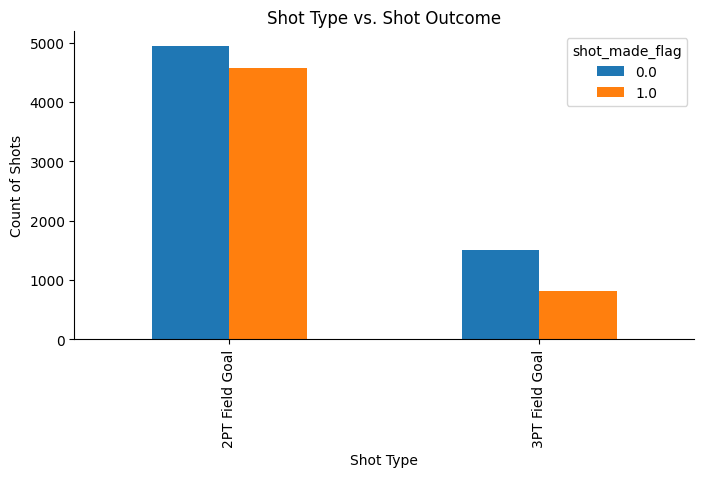

In [31]:
# TASK 2 EXERCISE

# Plot 'shot_type' versus the target variable 'shot_made_flag'
pd.crosstab(KobeDataset['shot_type'], KobeDataset['shot_made_flag']).plot(kind="bar", figsize=(8, 4))
plt.title("Shot Type vs. Shot Outcome")
plt.xlabel("Shot Type")
plt.ylabel("Count of Shots")
sns.despine()
plt.show()

## What is Logistic Regression?

### ANALYSIS: What is logistic regression?

Tasks:
1. Run the logistic regression code, analyze the code and the output.

#### TASK 1: Run and Analyze the Logistic Regression Code

Model Accuracy: 0.60580


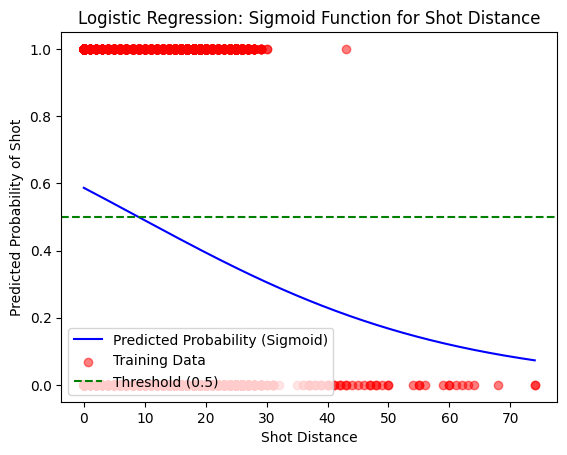

In [32]:
# TASK 1 EXERCISE AND SOLUTION

# Selecting one feature (shot_distance) for logistic regression
X = KobeDataset[['shot_distance']]  # Only using shot distance as the feature
y = KobeDataset['shot_made_flag']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model (without standardization)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

# Visualizing the sigmoid function and the threshold
def plot_sigmoid(X, model):

    # Create a range of shot distances for smooth plotting
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    # Get predicted probabilities for this range
    y_proba = model.predict_proba(X_range)[:, 1]
    # print(y_proba)

    # Plotting the sigmoid curve
    plt.plot(X_range, y_proba, label="Predicted Probability (Sigmoid)", color="blue")
    plt.scatter(X_train, y_train, label="Training Data", alpha=0.5, color="red")
    plt.axhline(0.5, color='green', linestyle='--', label="Threshold (0.5)")
    plt.title("Logistic Regression: Sigmoid Function for Shot Distance")
    plt.xlabel("Shot Distance")
    plt.ylabel("Predicted Probability of Shot")
    plt.legend(loc = 'lower left')
    plt.show()

# Plot the sigmoid curve
plot_sigmoid(X, log_reg)

**DISCUSSION QUESTION:** For our initial logistic regression fit, what are the chosen input and output?

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** Use the generated plot to answer the following question: what is fit in a Logistic Regression?

*FOR ANSWER REFER TO NOTION!*

**DISCUSSION QUESTION:** Use the generated plot to answer the following question: how are predictions made in Logistic Regression?

*FOR ANSWER REFER TO NOTION!*

## EXERCISE: Train a Baseline Model

Tasks:
1. Fit a `LogisticRegression()` model with your own set of features. Make sure to look at the accuracy of your model and compare it to the simple case we showed above.

#### TASK 1: Fit your own `LogisticRegression()` with your own set of Features

In [ ]:
# TASK 1 EXERCISE

''' ADD YOUR CODE HERE '''

**DISCUSSION QUESTION:** Review the concepts of one-hot and multi-hot encoding through the concept pages on Notion. Then, given the following feature of a dataset, usually a column vector (5 rows x 1 column;5 data points x 1 feature). Convert this to a one-hot representation. What would the one-hot representation of the following set of 5 samples be?

*YOUR ANSWER HERE:*

## Feature Engineering

### EXERCISE: Encode Categorical Data

Tasks:
1. Encode the `shot_zone_basic` feature into one-hot encoding using the method `pd.get_dummies(~, prefix = "shot_zone")`. Then, identify the shot_zone for the 979th datapoint using the `.iloc(~)` method.
2. Train a `LogisticRegression()` model with this new feature. You can add the new feature using the `df.join(~)` method. How many extra columns were created for this new variable? Did the accuracy improve?

#### TASK 1: Generate a One-Hot Vector Encoding of `shot_zone_basic`

In [ ]:
# TASK 1 EXERCISE

# Display the frequency of each category in the 'shot_zone_basic' column
print(KobeDataset["shot_zone_basic"].value_counts())
print('\n')

# Generate one-hot encoded columns for each category in 'shot_zone_basic'
# and use 'shot_zone' as the prefix for the new columns
shot_zones = <REPLACE ME AND MY ARROWS>

# Show the first five rows of the resulting one-hot encoded DataFrame
shot_zones.head(5)

# Check the shot_zone for datapoint 979
''' ADD YOUR CODE HERE '''

#### TASK 2: Train your own `LogisticRegression()` with this new Categorical Variable

In [ ]:
# TASK 2 EXERCISE

# Add this New Feature to your Dataset
KobeDataset.shape
KobeDataset = <REPLACE ME AND MY BRACKETS>
KobeDataset.shape

# Look at your New Columns
print(list(KobeDataset.columns))

# TRAIN A NEW LOGISTIC REGRESSION ----------------------------------------------

''' ADD YOUR CODE HERE '''

**DISCUSSION QUESTION:** What potential issues might arise from using one-hot encoding on a feature with many unique categories?

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** What is the purpose of the sigmoid function in logistic regression?

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** What is the difference between numerical discrete and categorical nominal data types? Give an example of each from the Kobe Bryant dataset.

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** In the context of the Kobe Bryant shot dataset, what are some examples of categorical features that might benefit from one-hot encoding?

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** How does one-hot encoding work, and when should it be used?

*YOUR ANSWER HERE:*

**DISCUSSION QUESTION:** What is feature engineering and why is it important in machine learning?

*YOUR ANSWER HERE:*